This is the notebook for solution of the course work at the "Python libraries: continuous". 
The classification task to predict whether the credit will be paid the next month by the loaner (0) or not (1).
Precision, recall, f1-score of the built model have to be more than 0.5

Курсовая работа по библиотекам python. Цель - построить модель для прогнозирования просрочки выплаты по кредиту. 
Precision, recall, f1-мера должны быть больше 0.5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = 'course_project_train.csv'
PREP_DATASET_PATH = 'course_project_train_prep.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)
#Или если используются нестандартные разделители: df = pd.read_csv(DATASET_PATH, sep=';')
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [4]:
df.shape

(7500, 17)

In [5]:
df.iloc[0]

Home Ownership                            Own Home
Annual Income                             482087.0
Years in current job                           NaN
Tax Liens                                      0.0
Number of Open Accounts                       11.0
Years of Credit History                       26.3
Maximum Open Credit                       685960.0
Number of Credit Problems                      1.0
Months since last delinquent                   NaN
Bankruptcies                                   1.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                     99999999.0
Current Credit Balance                     47386.0
Monthly Debt                                7914.0
Credit Score                                 749.0
Credit Default                                   0
Name: 0, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
#for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
#    df[colname] = df[colname].astype(str)

In [8]:
df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [9]:
df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [10]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [11]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

Заполнение пропусков.

In [12]:
df1 = df.fillna({'Annual Income': df['Annual Income'].median(),'Months since last delinquent': 0.0, 
                 'Bankruptcies': 0.0, 'Credit Score': df['Credit Score'].median(), 'Years in current job': df['Years in current job'].mode()[0]})
df1

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,1168386.0,10+ years,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,731.0,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Поработаем с признаком "Стаж на текущем рабочем месте". Была мысль заполнить пропуски с помощью обучения, но для этого пришлось бы разбивать датасет на два построчно (с пустым / непустым) значением признака, а последующем соединении датасетов изменился бы порядок строк. (а по условию его менять нельзя). Поэтому заполнили пропуски модой (выше). Сгруппируем покомпактнее значения данного столбца.

In [14]:
df1['Years in current job']

0       10+ years
1       10+ years
2         8 years
3         6 years
4         8 years
          ...    
7495     < 1 year
7496       1 year
7497      6 years
7498    10+ years
7499      4 years
Name: Years in current job, Length: 7500, dtype: object

Заменим данные признака "Стаж на текущем рабочем месте"

In [15]:
df1['Years in current job'].loc[df1['Years in current job']=='< 1 year'] = 0
df1['Years in current job'].loc[(df1['Years in current job']=='1 year') | (df1['Years in current job']=='2 years') | (df1['Years in current job']=='3 years')] = 1
df1['Years in current job'].loc[(df1['Years in current job']=='4 years') | (df1['Years in current job']=='5 years') | (df1['Years in current job']=='6 years')] = 2
df1['Years in current job'].loc[(df1['Years in current job']=='7 years') | (df1['Years in current job']=='8 years') | (df1['Years in current job']=='9 years')] = 3
df1['Years in current job'].loc[df1['Years in current job']=='10+ years'] = 4
df1['Years in current job'].value_counts()

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4    2703
1    1829
2    1411
3     994
0     563
Name: Years in current job, dtype: int64

Посмотрим наборы значений количественных признаков. И визуализируем их для выявления выбросов.

In [16]:
for cat_colname in df1.select_dtypes(include='float64').columns:
    print(df1[cat_colname].value_counts())

1168386.0    1558
1043651.0       4
1338113.0       4
1161660.0       4
1058376.0       4
             ... 
1211782.0       1
2185646.0       1
2326075.0       1
330429.0        1
648166.0        1
Name: Annual Income, Length: 5478, dtype: int64
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64
9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
33.0      6
31.0      6
32.0      6
34.0      2
37.0      2
42.0      1
43.0      1
35.0      1
38.0      1
41.0      1
Name: Number of Open Accounts, dtype: int64
15.0    104
16.0     99
16.5     91
17.0     86
17.5     83
       ... 
43.5      1
50.0      1
40.1      1
51.5    

<AxesSubplot:xlabel='Annual Income'>

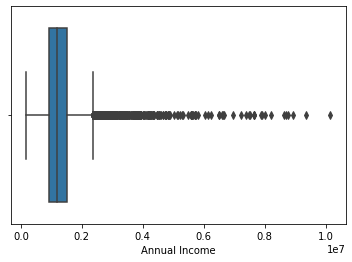

In [17]:
sns.boxplot(x=df1['Annual Income'])

In [18]:
print(df1['Annual Income'].quantile(0.75))
print(df1.loc[df1['Annual Income'] > (df1['Annual Income'].quantile(0.75)*6)])

1499974.0
     Home Ownership  Annual Income Years in current job  Tax Liens  \
2200           Rent      9338880.0                    4        0.0   
6472           Rent     10149344.0                    2        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
2200                      7.0                      7.3            1092608.0   
6472                     10.0                     17.5             270380.0   

      Number of Credit Problems  Months since last delinquent  Bankruptcies  \
2200                        0.0                           0.0           0.0   
6472                        0.0                          22.0           0.0   

                 Purpose        Term  Current Loan Amount  \
2200       business loan  Short Term             788480.0   
6472  debt consolidation  Short Term             664818.0   

      Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
2200                326496.0       40546.0  

Text(0.5, 1.0, 'Анализ выбросов для признака Tax Liens')

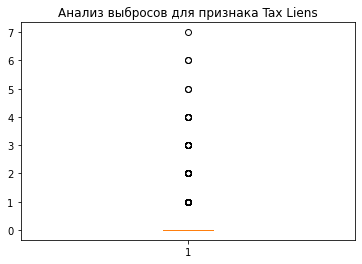

In [19]:
plt.boxplot(df1['Tax Liens'])
plt.title('Анализ выбросов для признака Tax Liens')

Text(0.5, 1.0, 'Анализ выбросов для признака Number of Open Accounts')

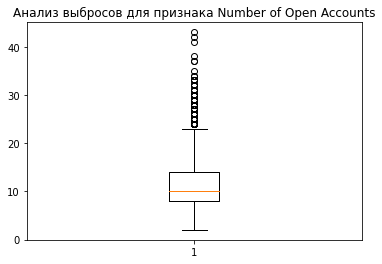

In [20]:
plt.boxplot(df1['Number of Open Accounts'])
plt.title('Анализ выбросов для признака Number of Open Accounts')

Text(0.5, 1.0, 'Анализ выбросов для признака Years of Credit History')

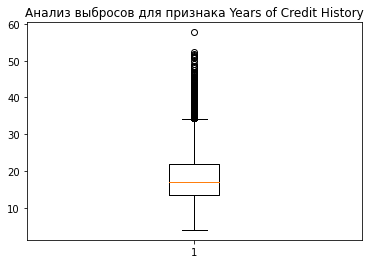

In [21]:
plt.boxplot(df1['Years of Credit History'])
plt.title('Анализ выбросов для признака Years of Credit History')

<AxesSubplot:xlabel='Years of Credit History'>

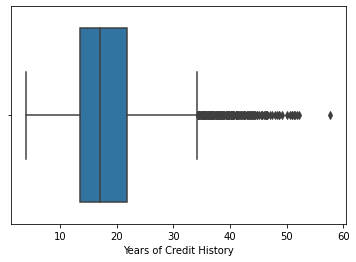

In [22]:
sns.boxplot(x=df1['Years of Credit History'])

In [23]:
df1.loc[df1['Years of Credit History'] > (df1['Years of Credit History'].quantile(0.75)*2.5)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
476,Home Mortgage,1076768.0,4,0.0,14.0,57.7,432124.0,0.0,24.0,0.0,debt consolidation,Long Term,558360.0,186219.0,13818.0,667.0,1


In [24]:
def higher_boarder(df, col_name):
    return df[col_name].quantile(0.75) + 1.5*(df[col_name].quantile(0.75) - df[col_name].quantile(0.25))

Text(0.5, 1.0, 'Анализ выбросов для признака Tax Liens')

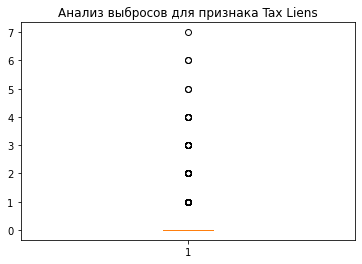

In [25]:
plt.boxplot(df1['Tax Liens'])
plt.title('Анализ выбросов для признака Tax Liens')

Text(0.5, 1.0, 'Анализ выбросов для признака Maximum Open Credit')

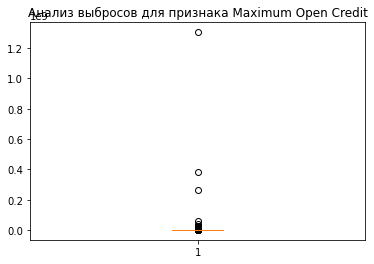

In [26]:
plt.boxplot(df1['Maximum Open Credit'])
plt.title('Анализ выбросов для признака Maximum Open Credit')

<AxesSubplot:xlabel='Maximum Open Credit'>

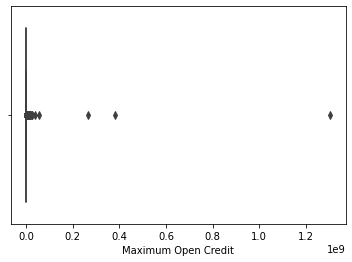

In [27]:
sns.boxplot(x=df1['Maximum Open Credit'])

In [28]:
df1.loc[df1['Maximum Open Credit'] > (higher_boarder(df1,'Maximum Open Credit')*10)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
44,Have Mortgage,1334256.0,4,0.0,17.0,15.4,3.800523e+08,1.0,35.0,0.0,take a trip,Short Term,33110.0,656450.0,34357.0,729.0,0
617,Home Mortgage,1168386.0,1,0.0,13.0,27.5,1.304726e+09,0.0,0.0,0.0,debt consolidation,Short Term,529892.0,1126814.0,5492.0,731.0,0
2023,Rent,1342825.0,4,0.0,12.0,16.3,5.756256e+07,0.0,0.0,0.0,other,Short Term,166826.0,944547.0,9176.0,749.0,0
2468,Home Mortgage,5589420.0,2,0.0,11.0,12.3,1.634591e+07,0.0,24.0,0.0,home improvements,Long Term,99999999.0,2315169.0,74991.0,735.0,0
2617,Home Mortgage,3217802.0,4,0.0,12.0,35.5,2.655129e+08,0.0,0.0,0.0,other,Short Term,50116.0,1834450.0,20272.0,750.0,0
2763,Home Mortgage,3377440.0,4,0.0,11.0,23.2,4.092389e+07,0.0,59.0,0.0,home improvements,Short Term,99999999.0,1908550.0,5770.0,743.0,0
3170,Home Mortgage,2226230.0,4,0.0,20.0,19.0,1.868381e+07,0.0,0.0,0.0,buy a car,Short Term,111892.0,2355867.0,17123.0,750.0,0
4769,Home Mortgage,3739960.0,3,0.0,7.0,22.8,2.634333e+07,0.0,0.0,0.0,home improvements,Short Term,757834.0,6506797.0,38023.0,703.0,0
5523,Home Mortgage,1520304.0,4,0.0,21.0,35.5,2.137243e+07,0.0,0.0,0.0,other,Long Term,99999999.0,1975012.0,12555.0,728.0,0
5731,Home Mortgage,1475198.0,3,0.0,10.0,24.9,1.928043e+07,0.0,0.0,0.0,debt consolidation,Short Term,99999999.0,1132286.0,17543.0,751.0,0


Примем эти выбросы слишком большими и малочисленными - и удалим, приравняв к верхней границе "ящика с усами".

In [29]:
df1['Maximum Open Credit'].loc[df1['Maximum Open Credit'] > higher_boarder(df1, 'Maximum Open Credit')*10] = higher_boarder(df1, 'Maximum Open Credit')

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Current Loan Amount'>

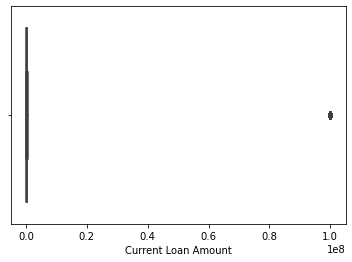

In [30]:
sns.boxplot(x=df1['Current Loan Amount'])

In [31]:
print(df1.loc[df1['Current Loan Amount']==99999999.0])

     Home Ownership  Annual Income Years in current job  Tax Liens  \
0          Own Home       482087.0                    4        0.0   
2     Home Mortgage       751412.0                    3        0.0   
6     Home Mortgage      1511108.0                    4        0.0   
22             Rent       463790.0                    4        0.0   
27             Rent      1004055.0                    3        0.0   
...             ...            ...                  ...        ...   
7441           Rent      1406836.0                    1        0.0   
7445  Home Mortgage      1564384.0                    2        0.0   
7464  Home Mortgage      1159152.0                    2        0.0   
7475           Rent       848426.0                    4        0.0   
7497           Rent      1878910.0                    2        0.0   

      Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                        11.0                     26.3             685960.0   
2

Судя по тому, что данные в тех случаях, когда текущая сумма кредита равна 99999999.0, весьма разнообразны, притом есть визуальное преобладание краткого срока кредитования (над длинным) - можно предположить, что данные поля не отображают реальной суммы, и заменить их медианой.

In [32]:
df1['Current Loan Amount'].loc[df1['Current Loan Amount'] == 99999999.0] = df1['Current Loan Amount'].median()

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 1.0, 'Анализ выбросов для признака Current Credit Balance')

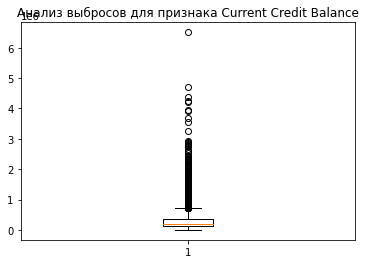

In [33]:
plt.boxplot(df1['Current Credit Balance'])
plt.title('Анализ выбросов для признака Current Credit Balance')

In [34]:
df1.loc[df1['Current Credit Balance'] > (df1['Current Credit Balance'].quantile(0.75) * 6)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
93,Home Mortgage,1168386.0,4,0.0,18.0,17.9,3028014.0,0.0,0.0,0.0,debt consolidation,Short Term,311168.0,2327443.0,55716.0,731.0,0
162,Home Mortgage,2131591.0,0,0.0,15.0,31.7,4191176.0,0.0,0.0,0.0,debt consolidation,Short Term,269258.0,3547262.0,20783.0,728.0,0
604,Home Mortgage,2822773.0,1,0.0,13.0,29.5,3409934.0,0.0,0.0,0.0,debt consolidation,Short Term,309573.0,2612177.0,50810.0,727.0,0
837,Home Mortgage,5131482.0,1,0.0,16.0,20.7,4860504.0,0.0,16.0,0.0,debt consolidation,Short Term,756228.0,2833451.0,44473.0,737.0,0
1233,Home Mortgage,1602403.0,1,0.0,12.0,19.7,3507042.0,0.0,0.0,0.0,debt consolidation,Long Term,458392.0,2913707.0,42464.0,676.0,0
1580,Home Mortgage,3783660.0,1,0.0,9.0,17.0,7204516.0,0.0,0.0,0.0,debt consolidation,Short Term,309573.0,4249673.0,42251.0,739.0,0
1601,Rent,7999095.0,4,0.0,15.0,15.0,6286192.0,0.0,30.0,0.0,debt consolidation,Short Term,762762.0,2540756.0,65059.0,715.0,0
1791,Rent,1168386.0,0,0.0,14.0,27.4,3567982.0,0.0,0.0,0.0,debt consolidation,Long Term,658548.0,2431259.0,48833.0,731.0,1
1931,Home Mortgage,2773468.0,4,0.0,8.0,29.0,3979206.0,0.0,12.0,0.0,debt consolidation,Short Term,309573.0,3271629.0,43682.0,727.0,0
1984,Home Mortgage,8758449.0,4,0.0,10.0,20.6,0.0,0.0,0.0,0.0,home improvements,Short Term,309573.0,2759503.0,12919.0,748.0,0


Мы видим, что это похоже на реальные данные, поэтому выбросы обрабатывать не будем.

Text(0.5, 1.0, 'Анализ выбросов для признака Monthly Debt')

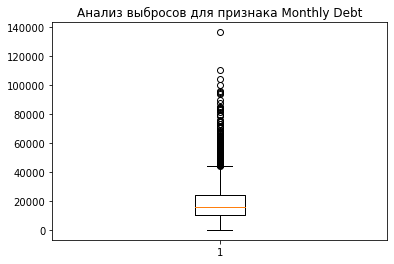

In [35]:
plt.boxplot(df1['Monthly Debt'])
plt.title('Анализ выбросов для признака Monthly Debt')

In [36]:
df1.loc[df1['Monthly Debt']>120000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4745,Own Home,6029954.0,2,0.0,30.0,17.5,11603856.0,0.0,0.0,0.0,debt consolidation,Short Term,753588.0,4720132.0,136679.0,745.0,0


Оставим эти данные

<AxesSubplot:xlabel='Credit Score'>

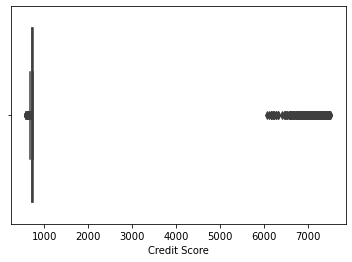

In [37]:
#plt.boxplot(df1['Credit Score'])
#plt.title('Анализ выбросов для признака Credit Score')
sns.boxplot(x=df1['Credit Score'])

In [38]:
df1.loc[df1['Credit Score'] > higher_boarder(df1, 'Credit Score')]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
69,Home Mortgage,1408527.0,1,0.0,12.0,17.5,700062.0,0.0,21.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1
87,Home Mortgage,1533566.0,3,0.0,11.0,14.8,715462.0,0.0,19.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1
94,Rent,1049294.0,1,0.0,5.0,6.1,249810.0,0.0,0.0,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1
96,Rent,757568.0,2,0.0,13.0,11.4,383548.0,0.0,0.0,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1
116,Home Mortgage,1039984.0,4,0.0,10.0,23.8,147950.0,0.0,63.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1,0.0,4.0,7.8,143066.0,0.0,0.0,0.0,debt consolidation,Long Term,244178.0,122075.0,4268.0,6690.0,1
7433,Rent,2011758.0,0,0.0,4.0,14.9,22176.0,0.0,43.0,0.0,buy a car,Long Term,106480.0,18791.0,12590.0,6060.0,1
7450,Home Mortgage,1432277.0,4,0.0,16.0,22.8,825176.0,0.0,0.0,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1
7460,Rent,769462.0,2,0.0,8.0,17.0,313786.0,0.0,80.0,0.0,debt consolidation,Short Term,109186.0,45524.0,4585.0,7470.0,1


Довольно сильный разброс данных, но это не случайные выбросы. К тому же видна заметная коррелляция: там, где значения Credit Score находятся в группе большого порядка - целевая переменная равна 1. То есть можем сделать вывод, что этот признак важен для обучения.

In [44]:
high_cs = df1.loc[df1['Credit Score'] > higher_boarder(df1, 'Credit Score')].shape[0]
high_cs_cd_1 = df1.loc[(df1['Credit Score'] > higher_boarder(df1, 'Credit Score')) & (df1['Credit Default'] == 1)].shape[0]
high_cs/ high_cs_cd_1

1.0

In [47]:
low_cs = df1.loc[df1['Credit Score'] < higher_boarder(df1, 'Credit Score')].shape[0]
low_cs_cd_1 = df1.loc[(df1['Credit Score'] < higher_boarder(df1, 'Credit Score')) & (df1['Credit Default'] == 1)].shape[0]
print (f'{(low_cs_cd_1 / low_cs ) * 100}%')

24.12676056338028%


Можно увидеть, что во всех случаях значений Credit Score в высоком диапазоне (6000-7500) целевая переменная равна 1. То есть имеет место быть 100% соответствие.

В других же случаях, когда величина Credit Score на порядок меньше (менее 700-800), целевая переменная равна 1 только в 24 % случаях.

In [48]:
df1['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

<AxesSubplot:xlabel='Months since last delinquent'>

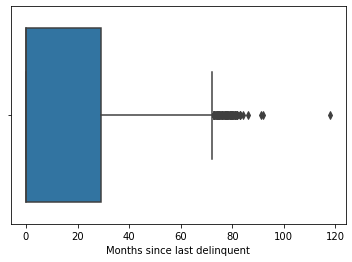

In [49]:
#df1['Months since last delinquent'].value_counts()
sns.boxplot(x=df1['Months since last delinquent'])

In [50]:
df['Credit Score'].value_counts()

740.0     169
747.0     168
748.0     157
745.0     152
742.0     151
         ... 
629.0       1
606.0       1
6830.0      1
6670.0      1
620.0       1
Name: Credit Score, Length: 268, dtype: int64

Категориальные признаки

In [51]:
df1[df1['Credit Default'] == 1]['Home Ownership'].value_counts()

Rent             1003
Home Mortgage     916
Own Home          192
Have Mortgage       2
Name: Home Ownership, dtype: int64

In [52]:
df1['Home Ownership'].replace({'Rent': 4, 'Home Mortgage': 3, 'Own Home': 2, 'Have Mortgage': 1})
#df1['Home Ownership'].value_counts()

0       2
1       2
2       3
3       2
4       4
       ..
7495    4
7496    3
7497    4
7498    3
7499    4
Name: Home Ownership, Length: 7500, dtype: int64

In [53]:
df1[df1['Credit Default'] == 1]['Purpose'].value_counts()

debt consolidation      1654
other                    197
home improvements        108
business loan             55
buy a car                 24
medical bills             22
small business            14
take a trip               10
buy house                  9
major purchase             9
wedding                    4
moving                     2
vacation                   2
renewable energy           2
educational expenses       1
Name: Purpose, dtype: int64

In [54]:
df1['Purpose'].replace({'debt consolidation': 15, 'other': 14, 'home improvements': 13, 'business loan': 12, 'buy a car': 11,
                        'medical bills': 10, 'small business': 9, 'take a trip': 8, 'major purchase': 7, 'buy house': 6, 
                        'wedding': 5, 'renewable energy': 4, 'moving': 3, 'vacation': 2, 'educational expenses': 1})
#df1['Purpose'].value_counts()

0       15
1       15
2       15
3       15
4       15
        ..
7495    14
7496    15
7497    11
7498    15
7499    15
Name: Purpose, Length: 7500, dtype: int64

In [55]:
df1.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,4,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,309573.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,4,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,3,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,309573.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,2,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,3,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [56]:
df1[df1['Credit Default'] == 1]['Term'].value_counts()

Short Term    1297
Long Term      816
Name: Term, dtype: int64

In [57]:
df1['Term'].replace({'Short Term': 2, 'Long Term': 1})

0       2
1       1
2       2
3       2
4       2
       ..
7495    2
7496    1
7497    2
7498    2
7499    2
Name: Term, Length: 7500, dtype: int64

In [58]:
#Функция для замещения значений категориальных признаков числами
def replace_cat(df):
        df_ = df.replace({'Home Ownership':{'Rent': 4, 'Home Mortgage': 3, 'Own Home': 2, 'Have Mortgage': 1}, 
                          'Term':{'Short Term': 2, 'Long Term': 1}, 
                          'Purpose': {'debt consolidation': 15, 'other': 14, 'home improvements': 13, 'business loan': 12, 'buy a car': 11, 
                                      'medical bills': 10, 'small business': 9, 'take a trip': 8, 'major purchase': 7, 'buy house': 6, 'wedding': 5, 
                                      'renewable energy': 4, 'moving': 3, 'vacation': 2, 'educational expenses': 1}
                         })
        return df_

In [59]:
df2 = replace_cat(df1)
df2.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,482087.0,4,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,15,2,309573.0,47386.0,7914.0,749.0,0
1,2,1025487.0,4,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,15,1,264968.0,394972.0,18373.0,737.0,1
2,3,751412.0,3,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,15,2,309573.0,308389.0,13651.0,742.0,0
3,2,805068.0,2,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,15,2,121396.0,95855.0,11338.0,694.0,0
4,4,776264.0,3,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,15,2,125840.0,93309.0,7180.0,719.0,0


In [60]:
df2 = df2.astype({'Home Ownership': np.float, 'Years in current job': np.float, 'Purpose': np.float, 'Term': np.float})

<ipython-input-60-7a7060b36d04>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df2 = df2.astype({'Home Ownership': np.float, 'Years in current job': np.float, 'Purpose': np.float, 'Term': np.float})


In [61]:
df2.dtypes

Home Ownership                  float64
Annual Income                   float64
Years in current job            float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                         float64
Term                            float64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [62]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [63]:
#def gaps_filling(df):
#    income_filling(df)

Исследуем признаки, их влияние на целевую переменную и друг на друга.

In [64]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df1.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df1.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

**Анализ целевой переменной**

In [65]:
df1[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

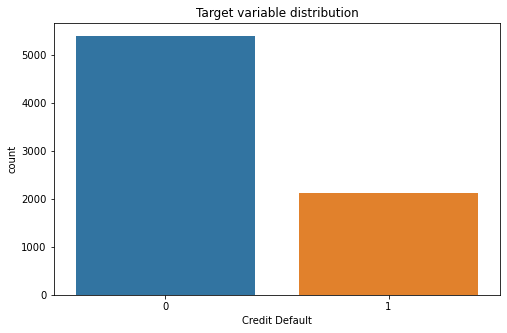

In [66]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df1)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

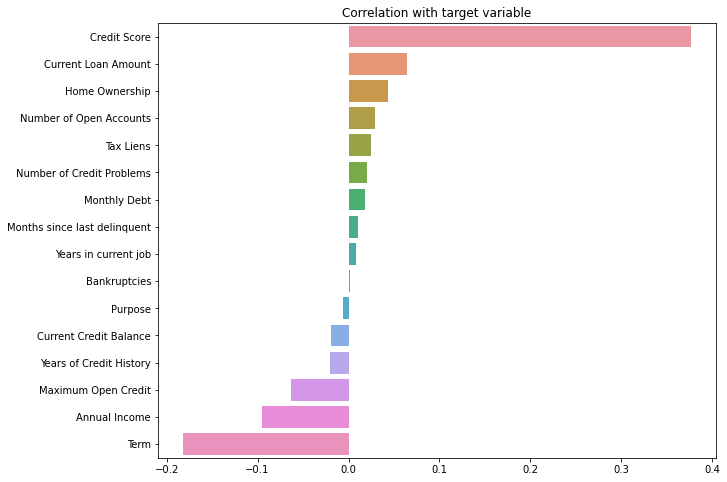

In [67]:
corr_with_target = df2[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "Credit Score" в разрезе целевой переменной**

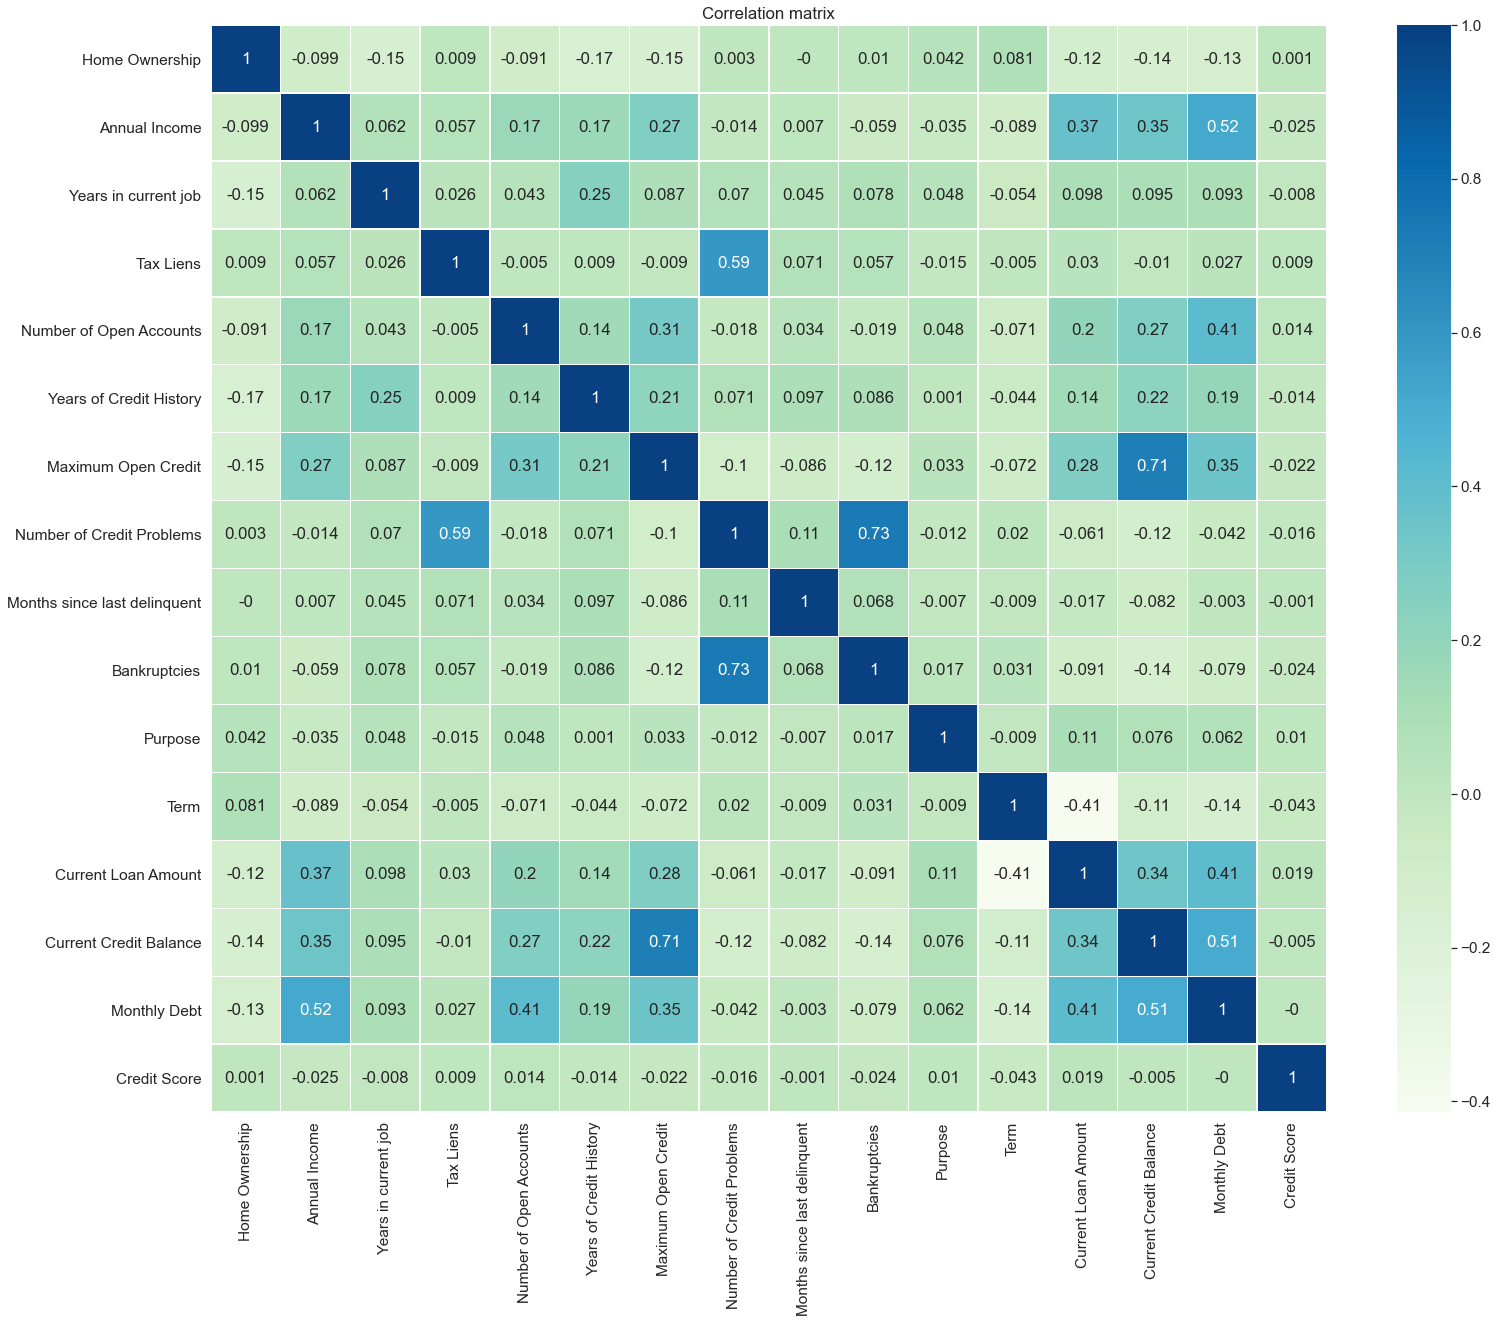

In [68]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df2[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Мы видим, что признак "Bankruptcies" имеет слабое влияние на целевую переменную, и в то же время сильно коррелирует с признаком "Number of credit problems" (0.73). Поэтому мы его удалим.

Также видим сильную взаимную корреляцию признаков "Maximum open credit" и "Current credit balance". Удалим вторую из них как имеющую меньшее влияние на целевую переменную.

In [69]:
df2.drop('Bankruptcies', axis = 1)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2.0,482087.0,4.0,0.0,11.0,26.3,685960.0,1.0,0.0,15.0,2.0,309573.0,47386.0,7914.0,749.0,0
1,2.0,1025487.0,4.0,0.0,15.0,15.3,1181730.0,0.0,0.0,15.0,1.0,264968.0,394972.0,18373.0,737.0,1
2,3.0,751412.0,3.0,0.0,11.0,35.0,1182434.0,0.0,0.0,15.0,2.0,309573.0,308389.0,13651.0,742.0,0
3,2.0,805068.0,2.0,0.0,8.0,22.5,147400.0,1.0,0.0,15.0,2.0,121396.0,95855.0,11338.0,694.0,0
4,4.0,776264.0,3.0,0.0,13.0,13.6,385836.0,1.0,0.0,15.0,2.0,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,4.0,402192.0,0.0,0.0,3.0,8.5,107866.0,0.0,0.0,14.0,2.0,129360.0,73492.0,1900.0,697.0,0
7496,3.0,1533984.0,1.0,0.0,10.0,26.5,686312.0,0.0,43.0,15.0,1.0,444048.0,456399.0,12783.0,7410.0,1
7497,4.0,1878910.0,2.0,0.0,12.0,32.1,1778920.0,0.0,0.0,11.0,2.0,309573.0,477812.0,12479.0,748.0,0
7498,3.0,1168386.0,4.0,0.0,21.0,26.5,1141250.0,0.0,0.0,15.0,2.0,615274.0,476064.0,37118.0,731.0,0


In [70]:
df2.drop('Current Credit Balance', axis = 1)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Monthly Debt,Credit Score,Credit Default
0,2.0,482087.0,4.0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,15.0,2.0,309573.0,7914.0,749.0,0
1,2.0,1025487.0,4.0,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,15.0,1.0,264968.0,18373.0,737.0,1
2,3.0,751412.0,3.0,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,15.0,2.0,309573.0,13651.0,742.0,0
3,2.0,805068.0,2.0,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,15.0,2.0,121396.0,11338.0,694.0,0
4,4.0,776264.0,3.0,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,15.0,2.0,125840.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,4.0,402192.0,0.0,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,14.0,2.0,129360.0,1900.0,697.0,0
7496,3.0,1533984.0,1.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,15.0,1.0,444048.0,12783.0,7410.0,1
7497,4.0,1878910.0,2.0,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,11.0,2.0,309573.0,12479.0,748.0,0
7498,3.0,1168386.0,4.0,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,15.0,2.0,615274.0,37118.0,731.0,0


Чтобы быть уверенными в цифрах, посмотрим, какие признаки имеют слишком малое влияние на целевой для дальнейшего использования:

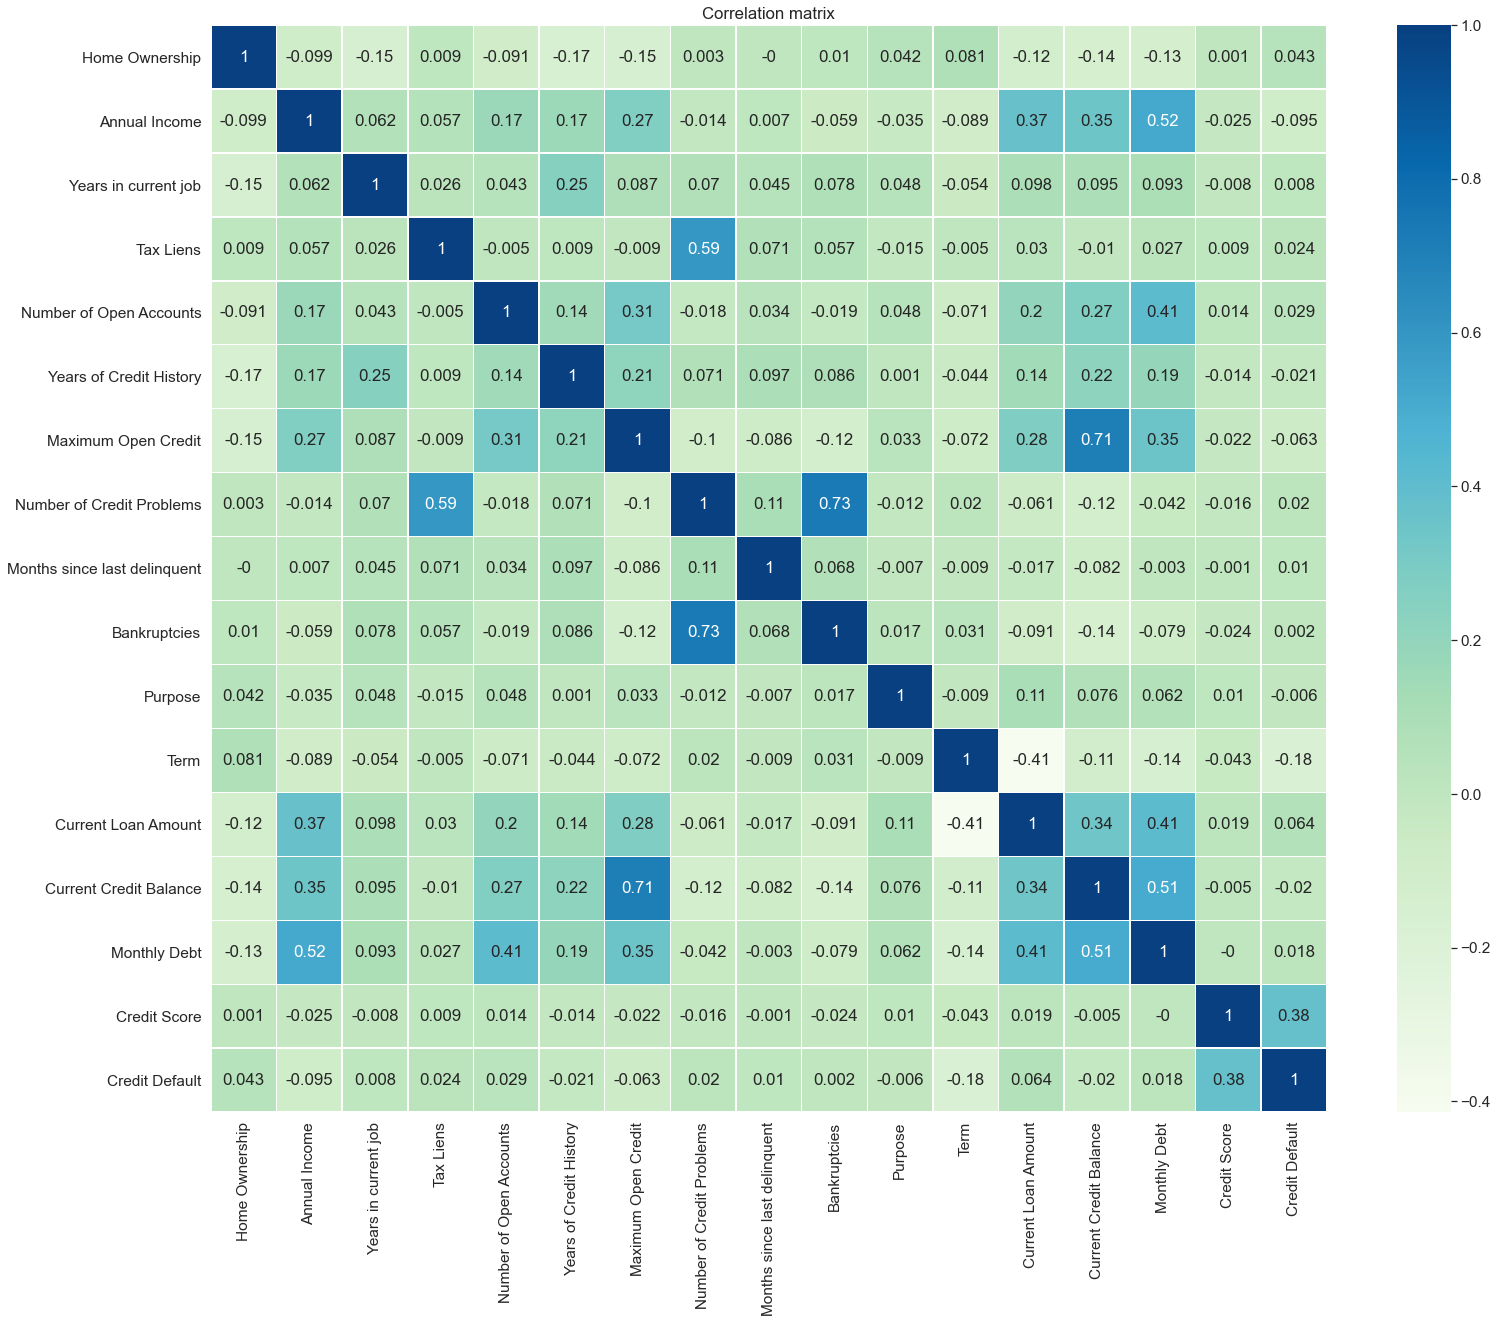

In [71]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df2[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Видим, что вполне можно удалить такие малозначимые признаки как "Years in current job" (как мы над ним ни потели, группируя значения), "Tax Liens", "Purpose"

In [72]:
#Напишем удаляющую функцию
def delete_features(df):
    df_ = df.drop(['Bankruptcies', 'Current Credit Balance', 'Years in current job', 'Tax Liens', 'Purpose'],axis=1)
    return df_

In [73]:
df2 = delete_features(df2)
df2.head()

,Home Ownership,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Term,Current Loan Amount,Monthly Debt,Credit Score,Credit Default
0,2.0,482087.0,11.0,26.3,685960.0,1.0,0.0,2.0,309573.0,7914.0,749.0,0
1,2.0,1025487.0,15.0,15.3,1181730.0,0.0,0.0,1.0,264968.0,18373.0,737.0,1
2,3.0,751412.0,11.0,35.0,1182434.0,0.0,0.0,2.0,309573.0,13651.0,742.0,0
3,2.0,805068.0,8.0,22.5,147400.0,1.0,0.0,2.0,121396.0,11338.0,694.0,0
4,4.0,776264.0,13.0,13.6,385836.0,1.0,0.0,2.0,125840.0,7180.0,719.0,0


In [74]:
#Соберем все функции для подготовки данных...  
    
def higher_boarder(df, col_name):
    return df[col_name].quantile(0.75) + 1.5*(df[col_name].quantile(0.75) - df[col_name].quantile(0.25))

def gaps_filling(df):
    df_ = df.fillna({'Annual Income': df['Annual Income'].median(),'Months since last delinquent': 0.0, 
                     'Bankruptcies': 0.0, 'Credit Score': df['Credit Score'].median(), 
                     'Years in current job': df['Years in current job'].mode()[0]})
    return df_

def outliers_processing(df):
    df['Maximum Open Credit'].loc[df['Maximum Open Credit'] > higher_boarder(df,'Maximum Open Credit')*10] = higher_boarder(df, 'Maximum Open Credit')
    df['Current Loan Amount'].loc[df['Current Loan Amount'] > 90000000.0] = df['Current Loan Amount'].median()
    return df

#В следующей функции будем заменять категориальные переменные числами только в двух столбцах, которые мы не будем удалять
def replace_cat(df):
        df_ = df.replace({'Home Ownership':{'Rent': 4, 'Home Mortgage': 3, 'Own Home': 2, 'Have Mortgage': 1}, 
                          'Term':{'Short Term': 2, 'Long Term': 1}, 
                         })
        return df_

def delete_features(df):
    df_ = df.drop(['Bankruptcies', 'Current Credit Balance', 'Years in current job', 'Tax Liens', 'Purpose'],axis=1)
    return df_

def scaler_func(df, numeric_feature_names):
    scaler = StandardScaler()
    df_norm = df.copy()
    df_norm[numeric_feature_names] = scaler.fit_transform(df_norm[numeric_feature_names])
    df =  df_norm.copy()
    return df

In [75]:
#...и оформим их в одну
def data_preprocessing(df, numeric_feature_names):
    df_ = gaps_filling(df)
    df__ = outliers_processing(df_)
    df___ = replace_cat(df__)
    df____ = delete_features(df___)
    df_____ = scaler_func(df____, numeric_feature_names)
    return df_____

In [ ]:
#Обозначим числовые признаки
NUMERIC_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 
                         'Number of Credit Problems', 'Months since last delinquent', 'Current Loan Amount', 'Monthly Debt', 
                         'Credit Score']

In [83]:
df2 = data_preprocessing(df, NUMERIC_FEATURE_NAMES)
df2.head()

,Home Ownership,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Term,Current Loan Amount,Monthly Debt,Credit Score,Credit Default
0,2,-1.114304,-0.026674,1.133645,0.037368,1.664779,-0.698307,2,0.002830,-0.872085,-0.218932,0
1,2,-0.396190,0.788223,-0.428528,0.680504,-0.340979,-0.698307,1,-0.257436,0.004909,-0.227276,1
2,3,-0.758385,-0.026674,2.369181,0.681418,-0.340979,-0.698307,2,0.002830,-0.391034,-0.223799,0
3,2,-0.687478,-0.637847,0.593985,-0.661277,1.664779,-0.698307,2,-1.095166,-0.584980,-0.257174,0
4,4,-0.725543,0.380774,-0.669954,-0.351967,1.664779,-0.698307,2,-1.069235,-0.933631,-0.239791,0


***Балансировка классов***

In [84]:
# class count
class_count_0, class_count_1 = df2['Credit Default'].value_counts()

# Separate class
class_0 = df2[df2['Credit Default'] == 0]
class_1 = df2[df2['Credit Default'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (5387, 12)
class 1: (2113, 12)


In [86]:
from imblearn import under_sampling, over_sampling

In [87]:
x = df2.drop(columns=['Credit Default'])

In [88]:
y = df2['Credit Default']

In [89]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_ros, y_ros = smote.fit_resample(x, y)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_ros))

Original dataset shape 7500
Resample dataset shape 10774


In [90]:
#Функция балансировки
def oversampling_func(df):
    x = df.drop(columns=['Credit Default'])
    y = df['Credit Default']
    from imblearn.over_sampling import SMOTE
    smote = SMOTE()
    x_ros, y_ros = smote.fit_resample(x, y)
    return x_ros, y_ros 

In [91]:
x_over, y_over = oversampling_func(df2)
print(x_over.shape, y_over.shape)

(10774, 11) (10774,)


Сохранение датасета

In [92]:
df2.to_csv(PREP_DATASET_PATH, index = False, encoding='utf-8')

***Подбор моделей, получение бейзлана***

In [94]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [95]:
import warnings
warnings.simplefilter('ignore')

In [96]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [97]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [98]:
SCALER_FILE_PATH = '../scaler.pkl'
MODEL_FILE_PATH = '../model.pkl'

In [99]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,Home Ownership,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Term,Current Loan Amount,Monthly Debt,Credit Score,Credit Default
0,2,-1.114304,-0.026674,1.133645,0.037368,1.664779,-0.698307,2,0.002830,-0.872085,-0.218932,0
1,2,-0.396190,0.788223,-0.428528,0.680504,-0.340979,-0.698307,1,-0.257436,0.004909,-0.227276,1
2,3,-0.758385,-0.026674,2.369181,0.681418,-0.340979,-0.698307,2,0.002830,-0.391034,-0.223799,0
3,2,-0.687478,-0.637847,0.593985,-0.661277,1.664779,-0.698307,2,-1.095166,-0.584980,-0.257174,0
4,4,-0.725543,0.380774,-0.669954,-0.351967,1.664779,-0.698307,2,-1.069235,-0.933631,-0.239791,0


**Выделение целевой переменной и групп признаков**

In [100]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
#NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()
FEATURE_NAMES_SELECTED = df.columns.drop([TARGET_NAME]).tolist()

Отбор признаков для нормализации

In [103]:
NUMERIC_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 
                         'Number of Credit Problems', 'Months since last delinquent', 'Current Loan Amount', 'Monthly Debt', 
                         'Credit Score']

**Нормализация данных**

In [104]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df =  df_norm.copy()

In [105]:
df.shape

(7500, 12)

**Разбиение на train и test**

In [106]:
X = df[FEATURE_NAMES_SELECTED]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

**Балансировка целевой переменной**

In [107]:
print(X_train.shape, y_train.shape)
print(y_train.value_counts())

(5625, 11) (5625,)
0    4047
1    1578
Name: Credit Default, dtype: int64


In [108]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
x_over, y_over = oversampling_func(df_for_balancing)
print(x_over.shape, y_over.shape)
print(y_over.value_counts())

(8094, 11) (8094,)
0    4047
1    4047
Name: Credit Default, dtype: int64


In [109]:
df_balanced = pd.concat([x_over, y_over], axis=1)
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [110]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.shape)

(8094, 11) (1875, 11) (8094,) (1875,)
(7500, 12)


In [111]:
df_balanced.to_csv('training_project_train_part_b.csv', index=False, encoding='utf-8')

df_test = pd.concat([X_test, y_test], axis=1)
df_test.to_csv('training_project_test_part.csv', index=False, encoding='utf-8')

***Построение и оценка базовых моделей***

**Логистическая регрессия**

In [112]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      4047
           1       0.71      0.53      0.61      4047

    accuracy                           0.66      8094
   macro avg       0.67      0.66      0.65      8094
weighted avg       0.67      0.66      0.65      8094

TEST

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1340
           1       0.49      0.54      0.52       535

    accuracy                           0.71      1875
   macro avg       0.65      0.66      0.66      1875
weighted avg       0.72      0.71      0.71      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1042  298
1                244  291


**k ближайших соседей**

In [113]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4047
           1       0.80      0.94      0.86      4047

    accuracy                           0.85      8094
   macro avg       0.86      0.85      0.85      8094
weighted avg       0.86      0.85      0.85      8094

TEST

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      1340
           1       0.40      0.58      0.48       535

    accuracy                           0.64      1875
   macro avg       0.60      0.62      0.60      1875
weighted avg       0.68      0.64      0.65      1875

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               881  459
1               225  310


**Бустинговые алгоритмы**

*XGBoost*

In [114]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[15:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4047
           1       0.99      0.94      0.96      4047

    accuracy                           0.97      8094
   macro avg       0.97      0.97      0.97      8094
weighted avg       0.97      0.97      0.97      8094

TEST

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1340
           1       0.56      0.44      0.50       535

    accuracy                           0.74      1875
   macro avg       0.68      0.65      0.66      1875
weighted avg       0.73      0.74      0.73      1875

CONFUSION MATRIX

col_0

*LightGBM*

In [115]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4047
           1       0.95      0.88      0.91      4047

    accuracy                           0.92      8094
   macro avg       0.92      0.92      0.92      8094
weighted avg       0.92      0.92      0.92      8094

TEST

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1340
           1       0.58      0.46      0.51       535

    accuracy                           0.75      1875
   macro avg       0.69      0.66      0.67      1875
weighted avg       0.74      0.75      0.74      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1160  180
1                291  244


*CatBoost*

In [116]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4047
           1       0.95      0.86      0.90      4047

    accuracy                           0.91      8094
   macro avg       0.91      0.91      0.91      8094
weighted avg       0.91      0.91      0.91      8094

TEST

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1340
           1       0.61      0.44      0.51       535

    accuracy                           0.76      1875
   macro avg       0.70      0.66      0.67      1875
weighted avg       0.74      0.76      0.75      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1187  153
1                300  235


***Выбор лучшей модели и подбор гиперпараметров***

In [117]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

**Подбор гиперпараметров**

In [118]:
params = {'n_estimators':[50, 100, 200, 500], 
          'max_depth':[3, 5, 7],
          'learning_rate':[0.001, 0.01, 0.05, 0.1]}

In [119]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [120]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

Wall time: 39 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000023373AA93A0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='f1')

In [121]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

In [122]:
rs.best_score_

0.7666981752261438

**Обучение и оценка финальной модели**

По условию задания precision, recall и f1-score на целевой переменной должны быть выше 0,5, поэтому параметры я всё-таки подбирала вручную.
Если рассмотрим специфику задачи - нахождение клиентов, которые допустят просрочку. Но что при этом будет критично нежелательно: 1. случайно засчитать тех, кто на самом деле заплатит или 2. не обнаружить в достаточном количестве тех, кто просрочит?
В данной задаче, не имея дополнительных запросов - не могу сказать. Поэтому оставим первоначальное требование к метрикам и не будем максимизировать отдельно precision или recall.

In [133]:
##### %%time

final_model = catb.CatBoostClassifier(n_estimators=150, max_depth=5, learning_rate=0.1,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4047
           1       0.82      0.78      0.80      4047

    accuracy                           0.80      8094
   macro avg       0.80      0.80      0.80      8094
weighted avg       0.80      0.80      0.80      8094

TEST

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1340
           1       0.53      0.55      0.54       535

    accuracy                           0.73      1875
   macro avg       0.67      0.68      0.68      1875
weighted avg       0.74      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1077  263
1                240  295


Признаков переобучения нет.

**Сохранение модели**

In [146]:
#scaler
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [147]:
#model
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

**Проверка качества, борьба с переобучением**

In [148]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [149]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [150]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [152]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

Пути к директориям и файлам

In [153]:
# input
TRAIN_FULL_PATH = 'course_project_train_prep.csv'
TRAIN_PART_PATH = 'training_project_train_part_b.csv'
TEST_PART_PATH = 'training_project_test_part.csv'

# output
MODEL_FILE_PATH = 'model.pkl'

Загрузка подготовленных датасетов

Загрузка данных

In [154]:
df = pd.read_csv(TRAIN_FULL_PATH)
df_train = pd.read_csv(TRAIN_PART_PATH)
df_test = pd.read_csv(TEST_PART_PATH)

In [155]:
df.columns.to_list()

['Home Ownership',
 'Annual Income',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Term',
 'Current Loan Amount',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

Выделение признакового описания и целевой переменной

In [156]:
TARGET_NAME = 'Credit Default'
NUM_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
                    'Number of Credit Problems', 'Months since last delinquent', 'Current Loan Amount', 'Monthly Debt',
                    'Credit Score']

CAT_FEATURE_NAMES = ['Home Ownership', 'Term']

In [157]:
X = df.drop(columns=CAT_FEATURE_NAMES + [TARGET_NAME])
y = df[TARGET_NAME]

X_train = df_train.drop(columns=TARGET_NAME)
y_train = df_train[TARGET_NAME]

X_test = df_test.drop(columns=TARGET_NAME)
y_test = df_test[TARGET_NAME]

Модель, полученная на предыдущем уроке

In [145]:
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4047
           1       0.82      0.78      0.80      4047

    accuracy                           0.80      8094
   macro avg       0.80      0.80      0.80      8094
weighted avg       0.80      0.80      0.80      8094

TEST

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1340
           1       0.53      0.55      0.54       535

    accuracy                           0.73      1875
   macro avg       0.67      0.68      0.68      1875
weighted avg       0.74      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1077  263
1                240  295


Снижение степени переобучения

In [158]:
final_model = catb.CatBoostClassifier(n_estimators=200, max_depth=5, learning_rate=0.05,
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4047
           1       0.82      0.79      0.80      4047

    accuracy                           0.81      8094
   macro avg       0.81      0.81      0.81      8094
weighted avg       0.81      0.81      0.81      8094

TEST

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1340
           1       0.52      0.54      0.53       535

    accuracy                           0.73      1875
   macro avg       0.67      0.67      0.67      1875
weighted avg       0.73      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1073  267
1                245  290


Подбор оптимального размера выборки, кривая обучения

In [159]:
final_model = catb.CatBoostClassifier(n_estimators=200, max_depth=5, learning_rate=0.05,
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

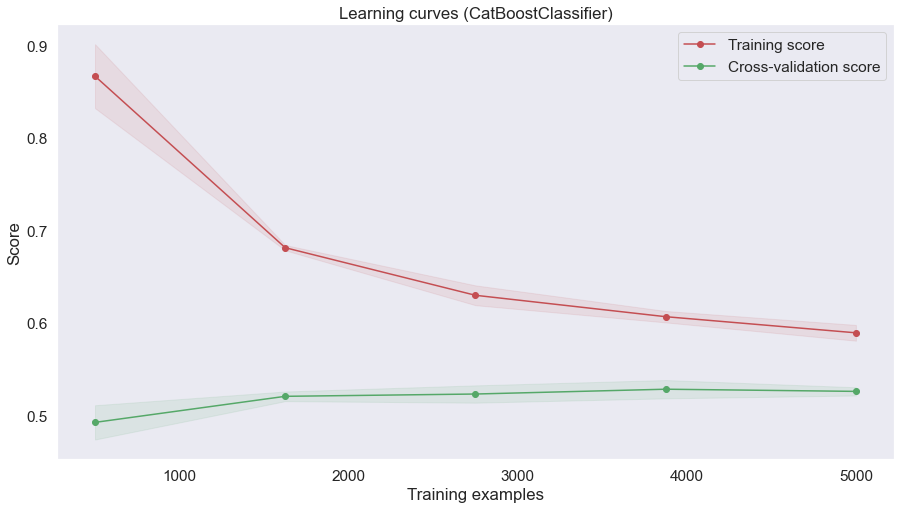

In [160]:
show_learning_curve_plot(final_model, X, y)

Выбор порога вероятности для определения класса

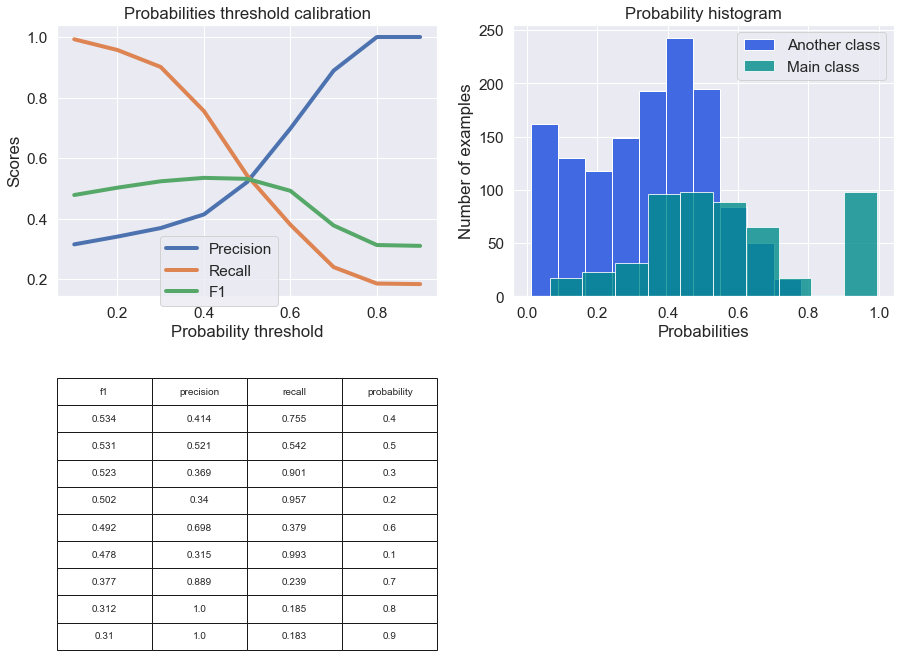

In [161]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

Важность признаков

In [165]:
final_model.feature_importances_

array(None, dtype=object)

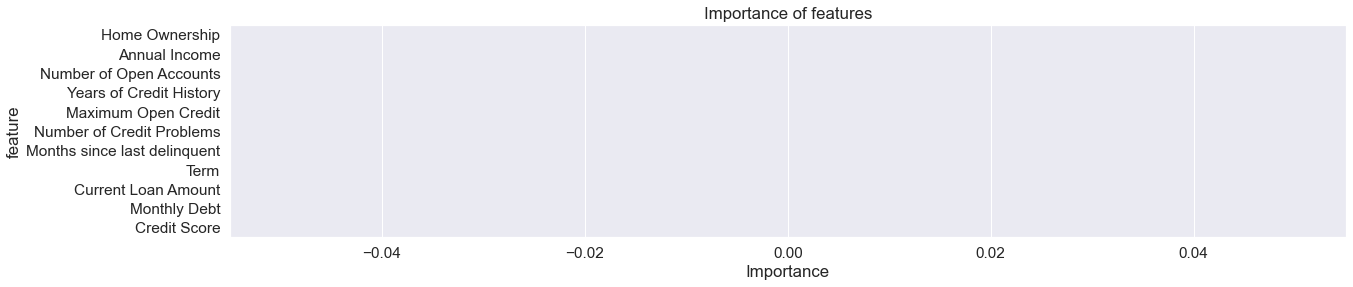

In [166]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [167]:
important_features_top

['Home Ownership',
 'Annual Income',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Term',
 'Current Loan Amount',
 'Monthly Debt',
 'Credit Score']

Финальная модель

In [168]:
final_model = catb.CatBoostClassifier(n_estimators=200, max_depth=5, learning_rate=0.05,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      4047
           1       0.83      0.80      0.81      4047

    accuracy                           0.81      8094
   macro avg       0.81      0.81      0.81      8094
weighted avg       0.81      0.81      0.81      8094

TEST

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1340
           1       0.52      0.55      0.54       535

    accuracy                           0.73      1875
   macro avg       0.67      0.68      0.67      1875
weighted avg       0.73      0.73      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1072  268
1                239  296


**Сохранение финальной модели**

In [169]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

**Вывод**

По визуализации важности признаков при построении финальной модели видим, что наибольшее влияние на целевую переменную имеет признак 'Number of Open Accounts' - количество открытых счетов. То есть, чем больше открытых счетов, тем более вероятна просрочка платежа. Что логично.
Второй по важности - 'Credit Score' (кредитный рейтинг) - "система оценки кредитоспособности (кредитных рисков) лица, основанная на численных статистических методах. Кредитный скоринг широко используется как крупными банками, микрофинансовыми организациями, так и в потребительском (магазинном) экспресс-кредитовании на небольшие суммы."
Но видим, что при оценке корреляции с целевой переменной этот признак шел с большим отрывом впереди, в то время как 'Number of Open Accounts' даже не входил в пятерку лидеров.
Далее в порядке убывания важности для модели:
 'Current Loan Amount',
 'Annual Income',
 'Maximum Open Credit',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Term',
 'Home Ownership',
 'Number of Credit Problems'
 
 Также при анализе "Credit Score" было обнаружено, что диапазон значений данного признака можно разделить на две числовые группы: низкие значения (700-800) и высокие значения (6000-7500).
При высоких значениях этого признака целевая переменная равна 1 (зафиксированная просрочка оплаты). То есть имеет место 100% соответствие.
При низких значениях целевая переменная равна 1 только в 24 % случаях.

Можно ли сделать практический вывод и утверждать, что все клиенты с высоким кредитным скорингом не платят во время? Не зная точно механизм подсчета кредитного скоринга, думаю - нет, нельзя, это было бы преждевременно.

**Прогнозирование на тестовом датасете**

Выполним для тестового датасета те же этапы обработки и отбора признаков

In [170]:
TEST_DATASET_PATH = 'course_project_test.csv'
PREDICTIONS_PATH = 'AKorostelyova_predictions.csv'

In [171]:
df_test = pd.read_csv(TEST_DATASET_PATH)
print(df_test.shape)
df_test.head()

(2500, 16)


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [172]:
#Обозначим числовые признаки
NUMERIC_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 
                         'Number of Credit Problems', 'Months since last delinquent', 'Current Loan Amount', 'Monthly Debt', 
                         'Credit Score']

In [173]:
df_test_prep = data_preprocessing(df_test, NUMERIC_FEATURE_NAMES)
print(df_test_prep.shape)
df_test_prep.head()

(2500, 11)


,Home Ownership,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Term,Current Loan Amount,Monthly Debt,Credit Score
0,4,-0.182442,-0.450224,-0.803220,-0.587052,-0.289398,2.405202,2,-0.883841,-0.992788,-0.255828
1,4,-1.335526,-1.068551,1.981755,-0.805286,-0.289398,-0.336726,2,-1.374743,-1.382250,-0.276284
2,3,-0.214033,-0.244115,-0.637776,-0.608698,-0.289398,-0.690524,2,-0.663923,0.039653,3.917884
3,3,-0.131479,0.992538,-0.182805,-0.275834,-0.289398,2.405202,2,-0.563587,0.804714,-0.250714
4,3,1.233554,-0.038006,0.727138,0.717289,-0.289398,-0.690524,1,2.703877,2.108349,-0.271809


In [174]:
df_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   int64  
 1   Annual Income                 2500 non-null   float64
 2   Number of Open Accounts       2500 non-null   float64
 3   Years of Credit History       2500 non-null   float64
 4   Maximum Open Credit           2500 non-null   float64
 5   Number of Credit Problems     2500 non-null   float64
 6   Months since last delinquent  2500 non-null   float64
 7   Term                          2500 non-null   int64  
 8   Current Loan Amount           2500 non-null   float64
 9   Monthly Debt                  2500 non-null   float64
 10  Credit Score                  2500 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 215.0 KB


Спрогнозируем целевую переменную, используя модель, построенную на обучающем датасете

In [175]:
y_test_pred = final_model.predict(df_test_prep)
len(y_test_pred)

2500

**Сохранение предсказаний**

In [176]:
pd.DataFrame(y_test_pred, columns=['predictions']).to_csv(PREDICTIONS_PATH, index = False, encoding='utf-8')

In [177]:
test_predictions_file = pd.read_csv(PREDICTIONS_PATH)
test_predictions_file.head()

,predictions
0,1
1,1
2,1
3,0
4,0


In [178]:
test_predictions_file.value_counts()

predictions
1              1792
0               708
dtype: int64

Распределение по классам похоже обратно пропорционально таковому на тренировочных данных. Хочется верить, что дело в специфике тестового датасета - собраны самые подозрительные записи, в которых вероятность клиента просрочить выплату выше среднего.